In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pcla_2021 = pd.read_csv('PCLA_2021.csv')

In [3]:
pcla_2021.head()

,emailName,subjectLine,category,sentCount,scheduledDateTimestamp,delivered,deliveredPercent,bounced,bouncedPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent,spamReport,spamReportPercent,sentFromGid
0,Dedicated Email Blast Jessica and Kavitha - Mo...,“Loving Sports When They Don’t Love You Back” ...,General Information,1574,2021-05-20 09:52:28-10:00,1573,99.93647,1,0.06353,940,59.75842,564,35.85506,13,0.82645,11,1.95035,11,1.95035,8,0.50858,1,0.06357,0,0,9
1,May 2021 Newsletter,"Virtual Penn Alumni Weekend, Networking + Volu...",General Information,1577,2021-05-11 05:30:00-10:00,1577,100.00000,0,0.00000,1069,67.78694,584,37.03234,68,4.31199,62,10.61644,44,7.53425,2,0.12682,2,0.12682,0,0,9
2,Second Reminder Getty Museum,Today! Behind the Scenes at the Getty Museum!,General Information,19,2021-04-29 08:29:39-10:00,19,100.00000,0,0.00000,56,294.73685,16,84.21053,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0,9
3,Reminder! Getty Museum,Reminder! Behind the Scenes at the Getty Museu...,General Information,19,2021-04-28 09:30:00-10:00,19,100.00000,0,0.00000,34,178.94737,11,57.89474,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0,9
4,Third Dedicated Email Blast Getty Museum,This Thursday! Behind the Scenes at the Getty ...,General Information,1574,2021-04-27 09:00:00-10:00,1572,99.87293,2,0.12706,832,52.92621,512,32.56997,11,0.69975,8,1.56250,8,1.56250,1,0.06361,0,0.00000,0,0,9


In [4]:
df_21 = pcla_2021.drop(columns=['spamReport', 'category','spamReportPercent','sentFromGid', 'bounced', 'bouncedPercent', 'category', 'emailName','deliveredPercent', 'unsubscribesPercent','sentCount', 'initialClicks', 'initialClicksPercent', 'conversionsPercent', 'opensPercent','uniqueOpensPercent','clicksPercent','uniqueClicksPercent', 'unsubscribes'])
df_21.head()

,subjectLine,scheduledDateTimestamp,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,“Loving Sports When They Don’t Love You Back” ...,2021-05-20 09:52:28-10:00,1573,940,564,13,11,8
1,"Virtual Penn Alumni Weekend, Networking + Volu...",2021-05-11 05:30:00-10:00,1577,1069,584,68,62,2
2,Today! Behind the Scenes at the Getty Museum!,2021-04-29 08:29:39-10:00,19,56,16,0,0,0
3,Reminder! Behind the Scenes at the Getty Museu...,2021-04-28 09:30:00-10:00,19,34,11,0,0,0
4,This Thursday! Behind the Scenes at the Getty ...,2021-04-27 09:00:00-10:00,1572,832,512,11,8,1


In [5]:
df_21 = df_21.dropna()
#df_19.set_index('subjectLine', inplace = True)

In [6]:
timeStamp = df_21['scheduledDateTimestamp']
print(timeStamp)

0     2021-05-20 09:52:28-10:00
1     2021-05-11 05:30:00-10:00
2     2021-04-29 08:29:39-10:00
3     2021-04-28 09:30:00-10:00
4     2021-04-27 09:00:00-10:00
5     2021-04-22 05:30:00-10:00
6     2021-04-06 09:10:00-10:00
7     2021-03-24 16:18:22-10:00
8     2021-03-22 09:00:00-10:00
9     2021-03-12 09:15:10-10:00
10    2021-02-18 11:24:48-10:00
11    2021-01-20 16:10:23-10:00
12    2021-01-18 08:00:00-10:00
13    2021-01-15 09:56:19-10:00
14    2021-01-13 08:59:26-10:00
15    2021-01-07 13:31:32-10:00
16    2020-12-29 13:41:16-10:00
Name: scheduledDateTimestamp, dtype: object


In [7]:
days = []
time = []
for index, value in timeStamp.items():
  #print(f"Index : {index}, Value : {value}")
  splitStamp = value.split(' ')
  #print(splitStamp)
  dayStamp = pd.to_datetime(splitStamp[0]).dayofweek
  days.append(dayStamp)
  time_stamp = int(splitStamp[1].split('-')[0].split(':')[0])
  time.append(time_stamp)

print(days)
print("=========")
print(time)

[3, 1, 3, 2, 1, 3, 1, 2, 0, 4, 3, 2, 0, 4, 2, 3, 1]
[9, 5, 8, 9, 9, 5, 9, 16, 9, 9, 11, 16, 8, 9, 8, 13, 13]


In [8]:
#Linear Model - DAY OF WEEK VS CONVERSIONS 
new_x = days
new_y = df_21['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#print(y_test)
y_pred = regressor.predict(X_test)
#print(y_pred)

#Monday
print("Monday conversions expectation: ", regressor.predict([[0]]))
#Tuesday
print("Tuesday conversions expectation: ",regressor.predict([[1]]))
#Wednesday
print("Wednesday conversions expectation: ",regressor.predict([[2]]))
#Thursday
print("Thursday conversions expectation: ",regressor.predict([[3]]))
#Friday
print("Friday conversions expectation: ",regressor.predict([[4]]))
#Saturday
print("Saturday conversions expectation: ",regressor.predict([[5]]))
#Sunday
print("Sunday conversions expectation: ",regressor.predict([[6]]))

Monday conversions expectation:  [10.16666667]
Tuesday conversions expectation:  [8.33333333]
Wednesday conversions expectation:  [6.5]
Thursday conversions expectation:  [4.66666667]
Friday conversions expectation:  [2.83333333]
Saturday conversions expectation:  [1.]
Sunday conversions expectation:  [-0.83333333]


In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-60.42592592592592


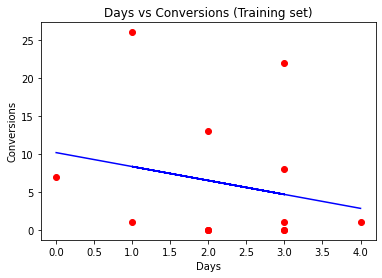

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Days vs Conversions (Training set)')
plt.xlabel('Days')
plt.ylabel('Conversions')
plt.show()

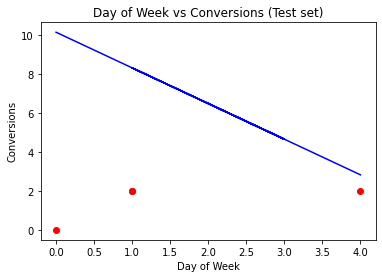

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Day of Week vs Conversions (Test set)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [15]:
df_21.describe()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1914.117647,1337.294118,680.705882,44.588235,37.470588,5.000000
std,2217.367016,1501.338726,778.309206,51.326235,44.718729,8.031189
min,19.000000,34.000000,11.000000,0.000000,0.000000,0.000000
25%,1518.000000,739.000000,431.000000,11.000000,9.000000,0.000000
50%,1567.000000,1045.000000,541.000000,41.000000,30.000000,1.000000
75%,1574.000000,1173.000000,623.000000,50.000000,43.000000,7.000000
max,7565.000000,5421.000000,2735.000000,204.000000,177.000000,26.000000


In [16]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   subjectLine             17 non-null     object
 1   scheduledDateTimestamp  17 non-null     object
 2   delivered               17 non-null     int64 
 3   opens                   17 non-null     int64 
 4   uniqueOpens             17 non-null     int64 
 5   clicks                  17 non-null     int64 
 6   uniqueClicks            17 non-null     int64 
 7   conversions             17 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ KB


In [17]:
df_21.corr()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
delivered,1.000000,0.990729,0.996387,0.861205,0.867167,-0.069396
opens,0.990729,1.000000,0.997013,0.898954,0.905519,-0.074191
uniqueOpens,0.996387,0.997013,1.000000,0.885237,0.893256,-0.086710
clicks,0.861205,0.898954,0.885237,1.000000,0.996335,-0.068533
uniqueClicks,0.867167,0.905519,0.893256,0.996335,1.000000,-0.122339
conversions,-0.069396,-0.074191,-0.086710,-0.068533,-0.122339,1.000000


In [18]:
#Model Time of Day vs Conversions
new_x = time
new_y = df_21['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#print(y_test)
y_pred = regressor.predict(X_test)
#print(y_pred)

#Predict Time
print("12 pm conversions expectation: ", regressor.predict([[12]]))
print("9 am conversions expectation: ", regressor.predict([[9]]))
print("5 pm conversions expectation: ", regressor.predict([[17]]))
print("3 pm conversions expectation: ", regressor.predict([[15]]))

12 pm conversions expectation:  [6.91411765]
9 am conversions expectation:  [5.43]
5 pm conversions expectation:  [9.38764706]
3 pm conversions expectation:  [8.39823529]


In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-17.373537716262973


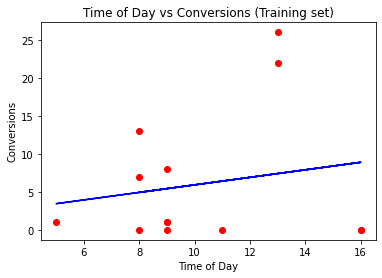

In [21]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time of Day vs Conversions (Training set)')
plt.xlabel('Time of Day')
plt.ylabel('Conversions')
plt.show()

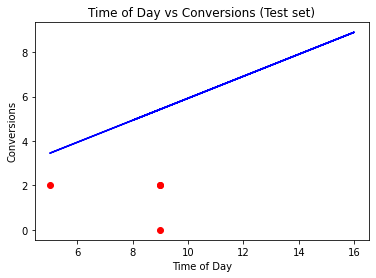

In [24]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time of Day vs Conversions (Test set)')
plt.xlabel('Time of Day')
plt.ylabel('Conversions')
plt.show()

In [25]:
#Random Forest
new_x = days
new_y = df_21['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(updated_x, new_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:
#Monday
print("Monday conversions expectation: ", regressor.predict([[0]]))
#Tuesday
print("Tuesday conversions expectation: ",regressor.predict([[1]]))
#Wednesday
print("Wednesday conversions expectation: ",regressor.predict([[2]]))
#Thursday
print("Thursday conversions expectation: ",regressor.predict([[3]]))
#Friday
print("Friday conversions expectation: ",regressor.predict([[4]]))
#Saturday
print("Saturday conversions expectation: ",regressor.predict([[5]]))
#Sunday
print("Sunday conversions expectation: ",regressor.predict([[6]]))

Monday conversions expectation:  [5.05833333]
Tuesday conversions expectation:  [8.87]
Wednesday conversions expectation:  [2.64333333]
Thursday conversions expectation:  [5.90595238]
Friday conversions expectation:  [1.6]
Saturday conversions expectation:  [1.6]
Sunday conversions expectation:  [1.6]


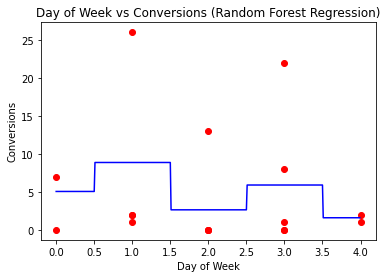

In [36]:
X_grid = np.arange(min(updated_x), max(updated_x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(updated_x, new_y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Day of Week vs Conversions (Random Forest Regression)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [23]:
#POLYNOMIAL REGRESSION
new_x = days
new_y = df_21['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)

In [30]:
#ON WHOLE DATASET
from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
#lin_reg.fit(updated_x, new_y)

#SPLIT UP DATASET
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#ON WHOLE DATASET
from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree = 4)
#X_poly = poly_reg.fit_transform(updated_x)
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, new_y)

#SPLIT UP DATASET
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-103.83333333332517

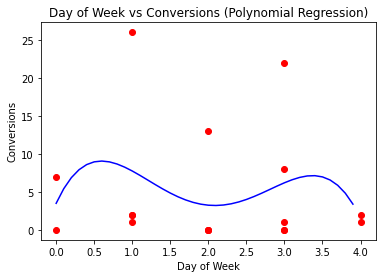

In [26]:
X_grid = np.arange(min(updated_x), max(updated_x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(updated_x, new_y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Day of Week vs Conversions (Polynomial Regression)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [27]:
lin_reg.predict([[0]])

array([6.07311321])

In [28]:
lin_reg_2.predict(poly_reg.fit_transform([[0]]))

array([3.5])